# Evaluation project-3 HR Analytics Project

In [9]:
import numpy as np
import pandas as pd
import sklearn

import scipy
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


import warnings
warnings.filterwarnings("ignore")

# Loading the Data

In [2]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

# Understanding the Datasets:

here are 35 columns in the dataset namely:
Some of the columns are here 

Age
Attrition
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EducationField
EmployeeCount
EmployeeNumber
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


Age--- Age of the candidate
Attrition--- Attrition occurs when the workforce dwindles at a company, following a period in which a number of people retire or resign, and are not replaced. 
BusinessTravel---- Business travel is travel undertaken for work or business purposes.
DailyRate--- DailyRate of attrtion
Department--- Department in which employee works
DistanceFromHome----Distance From Home to office
Education---Education of employee
EducationField--- In which field it work.
EmployeeCount---- Count of employee
EmployeeNumber---Total number of employee
RelationshipSatisfaction--- Satisfaction to relationship
StandardHours--- Standard Hours of working
StockOptionLevel---- Stock  Option  Level
TotalWorkingYears---- Total Working Years
TrainingTimesLastYear---- Training Times Last Year
WorkLifeBalance---- Work Life Balance
YearsAtCompany--- Years they spent  At  Company
YearsInCurrentRole--- Years In Current Role
YearsSinceLastPromotion--- Years Since Last Promotion
YearsWithCurrManager---- Years With Current Manager

In [4]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# Checking the null values

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Data Visualization

for Categorical Features we will use count plot it will give frequecy of the classes 

Age
Attrition
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EducationField
EmployeeCount
EmployeeNumber
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MaritalStatus
MonthlyIncome
MonthlyRate
NumCompaniesWorked
Over18
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager

35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


<AxesSubplot:xlabel='Age', ylabel='count'>

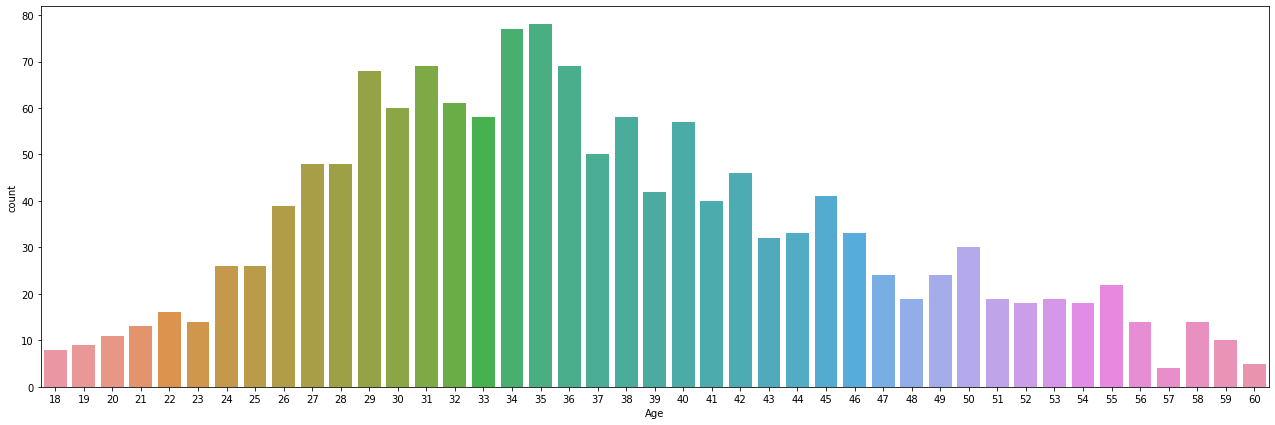

In [12]:
ax=df['Age'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['Age'])

Employee age is from 18 to 60 and max age range of employee is 28 to 38

No     1233
Yes     237
Name: Attrition, dtype: int64


<AxesSubplot:xlabel='Attrition', ylabel='count'>

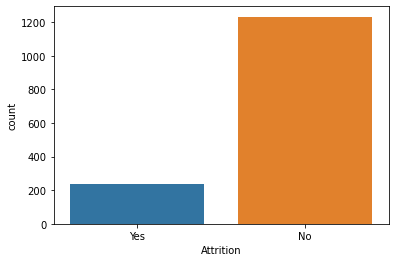

In [14]:
ax=df['Attrition'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['Attrition'])

now the class is not balance so we need to balance it using smote

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

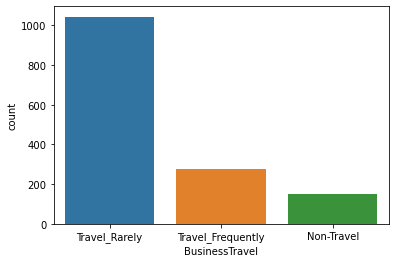

In [15]:
ax=df['BusinessTravel'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['BusinessTravel'])

BusinessTravel are 3 type 


Travel_Rarely        
Travel_Frequently     
Non-Travel

691     6
1082    5
329     5
1329    5
530     5
       ..
897     1
891     1
889     1
888     1
102     1
Name: DailyRate, Length: 886, dtype: int64


<AxesSubplot:xlabel='DailyRate', ylabel='count'>

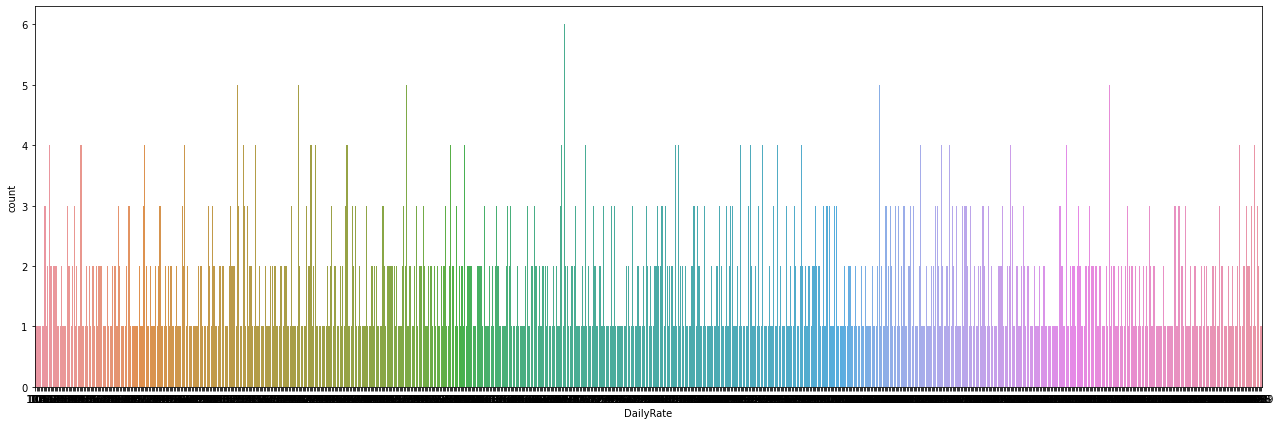

In [17]:
ax=df['DailyRate'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['DailyRate'])

Daily rate is too much spread

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


<AxesSubplot:xlabel='Department', ylabel='count'>

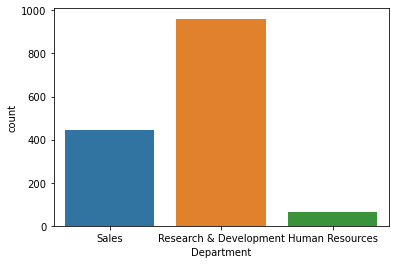

In [19]:
ax=df['Department'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['Department'])

there are 3 types of Department

Research & Development    
Sales                     
Human Resources

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
29     27
23     27
18     26
15     26
20     25
25     25
26     25
28     23
19     22
14     21
12     20
17     20
13     19
22     19
21     18
27     12
Name: DistanceFromHome, dtype: int64


<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

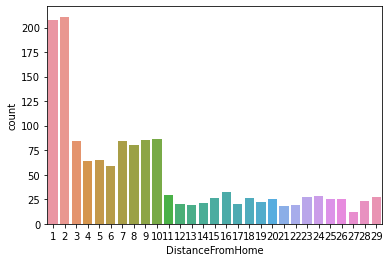

In [20]:
ax=df['DistanceFromHome'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['DistanceFromHome'])

DistanceFromHome is from 1 to 29

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64


<AxesSubplot:xlabel='Education', ylabel='count'>

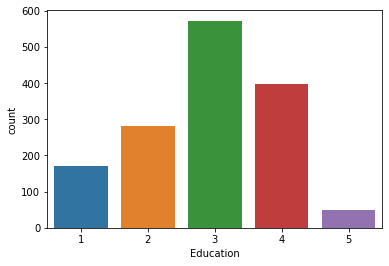

In [21]:
ax=df['Education'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['Education'])

there are 5 type of classes for Education

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


<AxesSubplot:xlabel='EducationField', ylabel='count'>

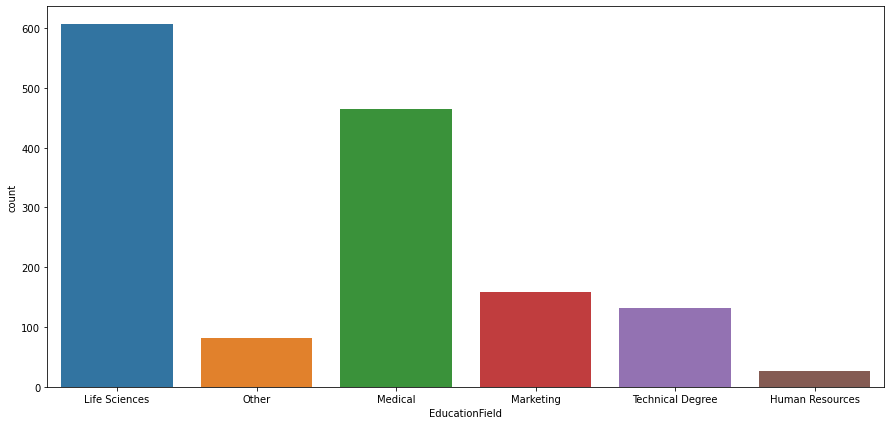

In [23]:
ax=df['EducationField'].value_counts()
print(ax)
plt.figure(figsize=(15,7))
sns.countplot(df['EducationField'])

Education fields are following
Life Sciences       
Medical             
Marketing           
Technical Degree    
Other               
Human Resources

1    1470
Name: EmployeeCount, dtype: int64


<AxesSubplot:xlabel='EmployeeCount', ylabel='count'>

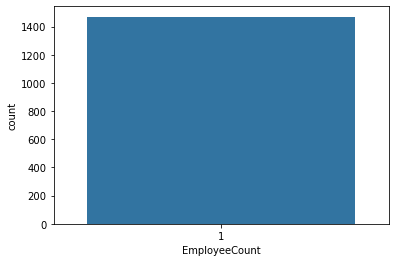

In [36]:
ax=df['EmployeeCount'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(df['EmployeeCount'])

Only 1 type of employee isvthere so we drop this column

In [45]:
df.drop(["EmployeeCount"],axis=1,inplace=True)

2046    1
641     1
644     1
645     1
647     1
       ..
1364    1
1367    1
1368    1
1369    1
2048    1
Name: EmployeeNumber, Length: 1470, dtype: int64


<AxesSubplot:xlabel='EmployeeNumber', ylabel='count'>

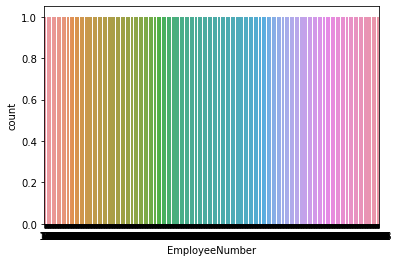

In [37]:
ax=df['EmployeeNumber'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(df['EmployeeNumber'])

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64


<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

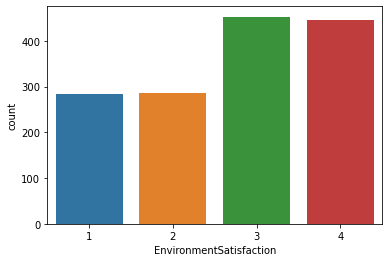

In [38]:
ax=df['EnvironmentSatisfaction'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(df['EnvironmentSatisfaction'])

EnvironmentSatisfaction it is of 4 types

Male      882
Female    588
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

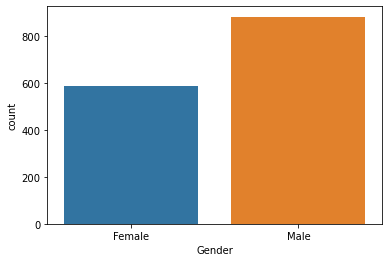

In [39]:
ax=df['Gender'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(df['Gender'])

66    29
42    28
98    28
48    28
84    28
      ..
31    15
68    14
53    14
38    13
34    12
Name: HourlyRate, Length: 71, dtype: int64


<AxesSubplot:xlabel='HourlyRate', ylabel='count'>

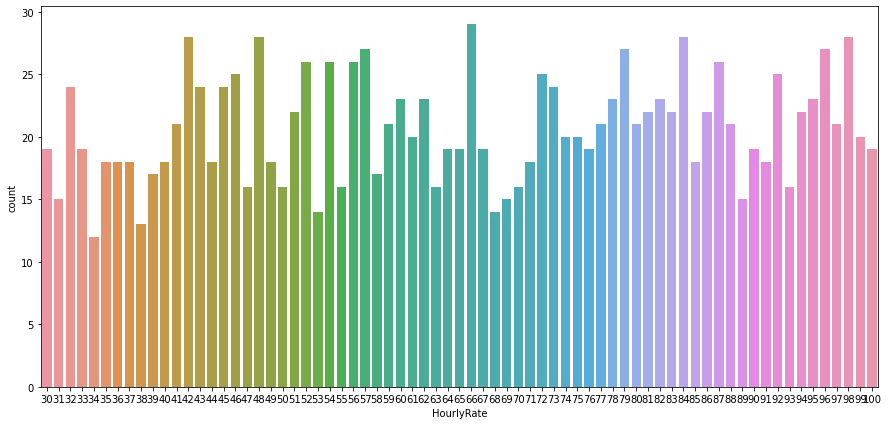

In [41]:
ax=df['HourlyRate'].value_counts()
print(ax)
plt.figure(figsize=(15,7))
sns.countplot(df['HourlyRate'])

HourlyRate are from 30 to 100

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64


<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

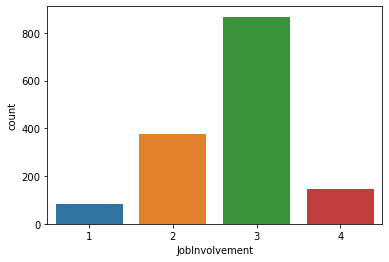

In [42]:
ax=df['JobInvolvement'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(df['JobInvolvement'])

JobInvolvement is of 4 types

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64


<AxesSubplot:xlabel='JobLevel', ylabel='count'>

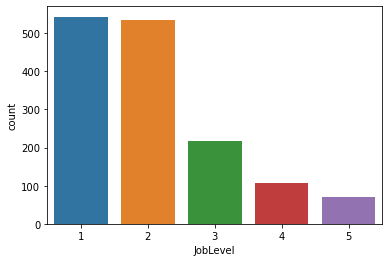

In [43]:
ax=df['JobLevel'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(df['JobLevel'])

Job level are 5 types

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


<AxesSubplot:xlabel='JobRole', ylabel='count'>

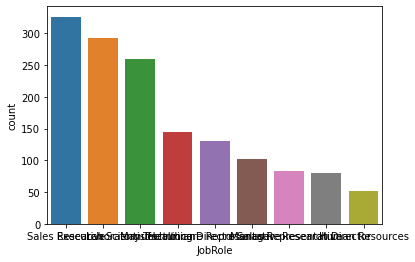

In [46]:
ax=df['JobRole'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(df['JobRole'])

These are the types of Jod role

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64


<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

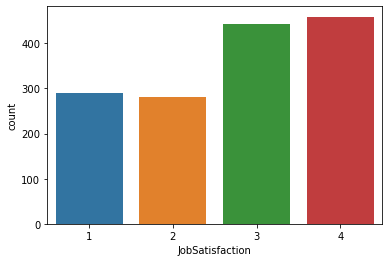

In [47]:
ax=df['JobSatisfaction'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(df['JobSatisfaction'])

In [ ]:
JobSatisfaction are 4 types

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

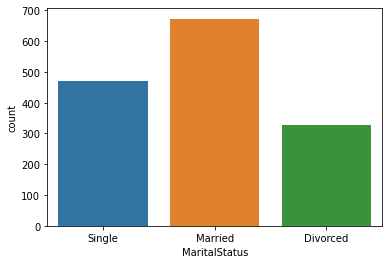

In [48]:
ax=df['MaritalStatus'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(df['MaritalStatus'])

3 types of MaritalStatus are 
single
married 
divorced

2342     4
5562     3
2741     3
2451     3
2610     3
        ..
5381     1
13577    1
12965    1
3339     1
14336    1
Name: MonthlyIncome, Length: 1349, dtype: int64


<AxesSubplot:xlabel='MonthlyIncome', ylabel='count'>

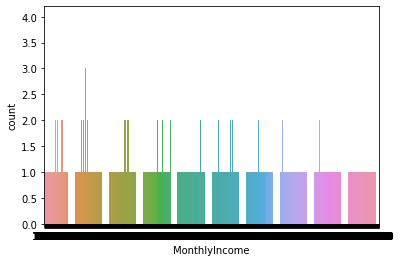

In [49]:
ax=df['MonthlyIncome'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(df['MonthlyIncome'])

MonthlyIncome is having 4 classes

4223     3
9150     3
6670     2
7324     2
4658     2
        ..
11585    1
15682    1
3395     1
9541     1
8192     1
Name: MonthlyRate, Length: 1427, dtype: int64


<AxesSubplot:xlabel='MonthlyRate', ylabel='count'>

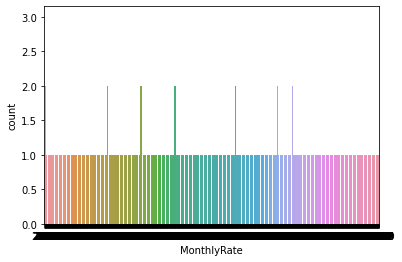

In [50]:
ax=df['MonthlyRate'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(df['MonthlyRate'])

MonthlyRate is having 3 classes

In [ ]:
NumCompaniesWorked
Over18
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64


<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

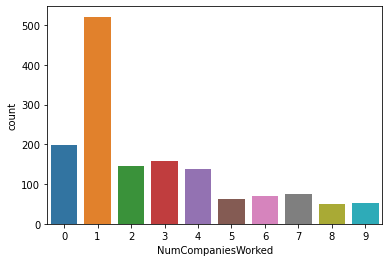

In [51]:
ax=df['NumCompaniesWorked'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(df['NumCompaniesWorked'])

NumCompaniesWorked are 9

Y    1470
Name: Over18, dtype: int64


<AxesSubplot:xlabel='Over18', ylabel='count'>

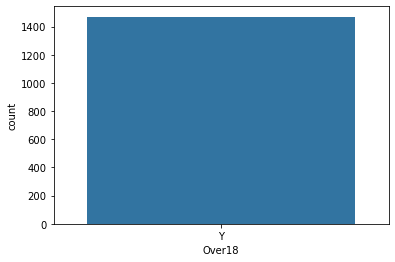

In [52]:
ax=df['Over18'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(df['Over18'])

It has only one class so we drop this column

In [53]:
df.drop(["Over18"],axis=1,inplace=True)

No     1054
Yes     416
Name: OverTime, dtype: int64


<AxesSubplot:xlabel='OverTime', ylabel='count'>

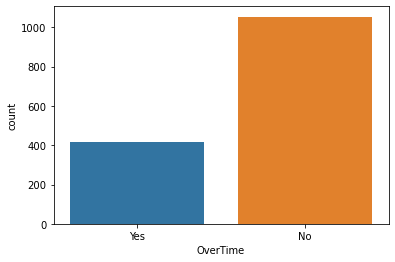

In [55]:
ax=df['OverTime'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(df['OverTime'])

It has two classes yes and no

11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64


<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

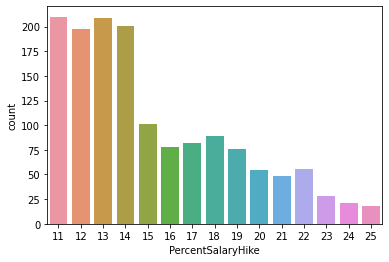

In [57]:
ax=df['PercentSalaryHike'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(df['PercentSalaryHike'])

PercentSalaryHike are from 11 to 25

3    1244
4     226
Name: PerformanceRating, dtype: int64


<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

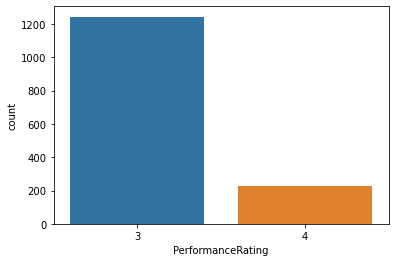

In [58]:
ax=df['PerformanceRating'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(df['PerformanceRating'])

PerformanceRating are of twp types 3 and 4

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64


<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

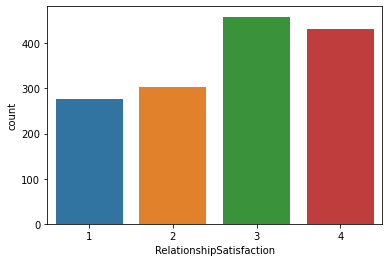

In [59]:
ax=df['RelationshipSatisfaction'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(df['RelationshipSatisfaction'])

RelationshipSatisfaction are 4 types

80    1470
Name: StandardHours, dtype: int64


<AxesSubplot:xlabel='StandardHours', ylabel='count'>

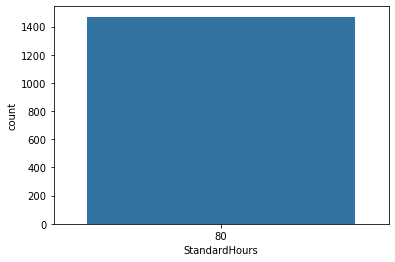

In [60]:
ax=df['StandardHours'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(df['StandardHours'])
#StockOptionLevel

It has only one class so we drop this column

In [61]:
df.drop(["StandardHours"],axis=1,inplace=True)

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64


<AxesSubplot:xlabel='StockOptionLevel', ylabel='count'>

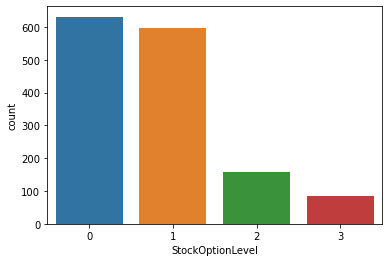

In [62]:
ax=df['StockOptionLevel'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(df['StockOptionLevel'])
#StockOptionLevel

StockOptionLevel are of 4 types

10    202
6     125
8     103
9      96
5      88
1      81
7      81
4      63
12     48
3      42
15     40
16     37
13     36
11     36
21     34
17     33
14     31
2      31
20     30
18     27
19     22
23     22
22     21
24     18
25     14
28     14
26     14
0      11
29     10
31      9
32      9
27      7
30      7
33      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: TotalWorkingYears, dtype: int64


<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

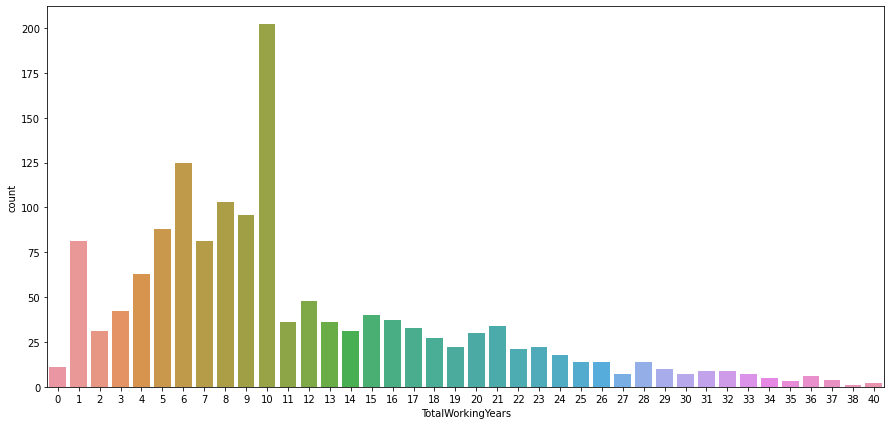

In [64]:
ax=df['TotalWorkingYears'].value_counts()
print(ax)
plt.figure(figsize=(15,7))
sns.countplot(df['TotalWorkingYears'])

#TrainingTimesLastYear

TotalWorkingYears are of from 0 to 40

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64


<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='count'>

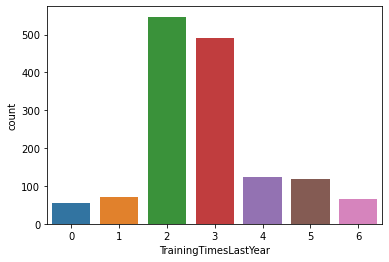

In [66]:
ax=df['TrainingTimesLastYear'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(df['TrainingTimesLastYear'])

#TrainingTimesLastYear

TrainingTimesLastYear are from 0 to 6

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64


<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

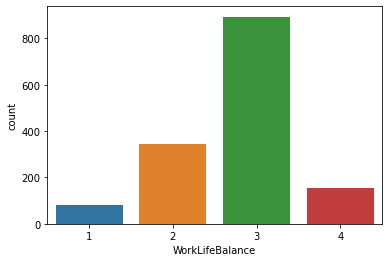

In [69]:
ax=df['WorkLifeBalance'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(df['WorkLifeBalance'])

#YearsAtCompany

It is of 4 types

5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
36      2
27      2
29      2
23      2
30      1
34      1
37      1
40      1
Name: YearsAtCompany, dtype: int64


<AxesSubplot:xlabel='YearsAtCompany', ylabel='count'>

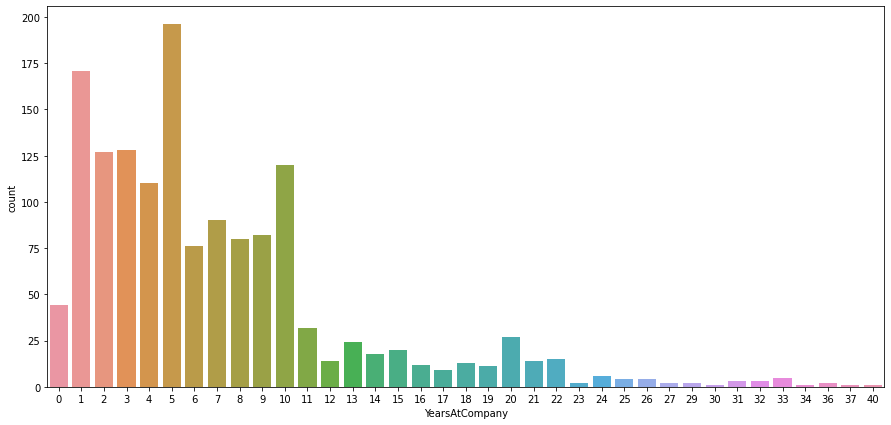

In [70]:
ax=df['YearsAtCompany'].value_counts()
print(ax)
plt.figure(figsize=(15,7))
sns.countplot(df['YearsAtCompany'])


2     372
0     244
7     222
3     135
4     104
8      89
9      67
1      57
6      37
5      36
10     29
11     22
13     14
14     11
12     10
15      8
16      7
17      4
18      2
Name: YearsInCurrentRole, dtype: int64


<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='count'>

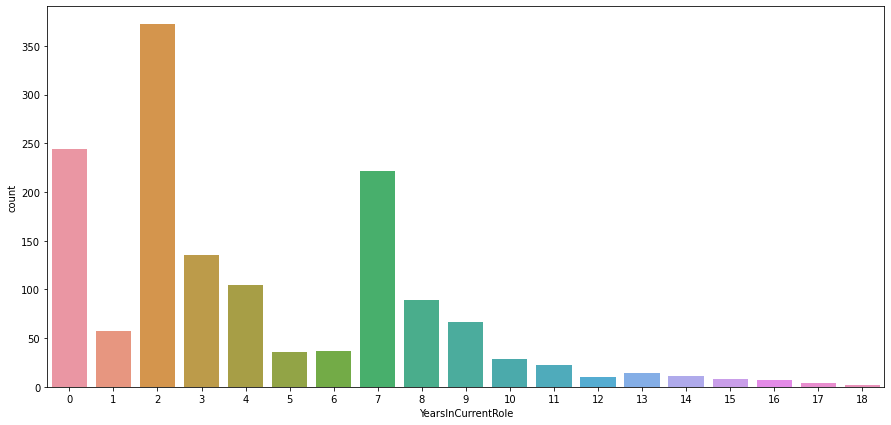

In [71]:
ax=df['YearsInCurrentRole'].value_counts()
print(ax)
plt.figure(figsize=(15,7))
sns.countplot(df['YearsInCurrentRole'])

#
#YearsWithCurrManager

YearsInCurrentRole are from 0 to 18

0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64


<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='count'>

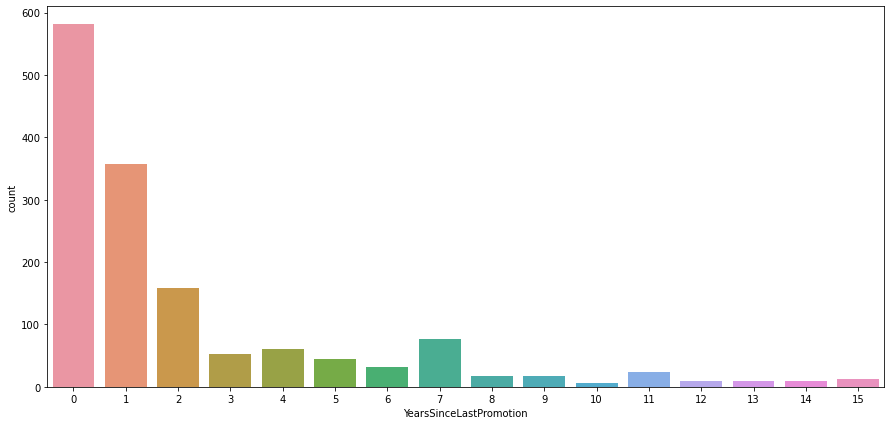

In [72]:
ax=df['YearsSinceLastPromotion'].value_counts()
print(ax)
plt.figure(figsize=(15,7))
sns.countplot(df['YearsSinceLastPromotion'])

YearsSinceLastPromotion are from 0 to 15

2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
14      5
15      5
16      2
Name: YearsWithCurrManager, dtype: int64


<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='count'>

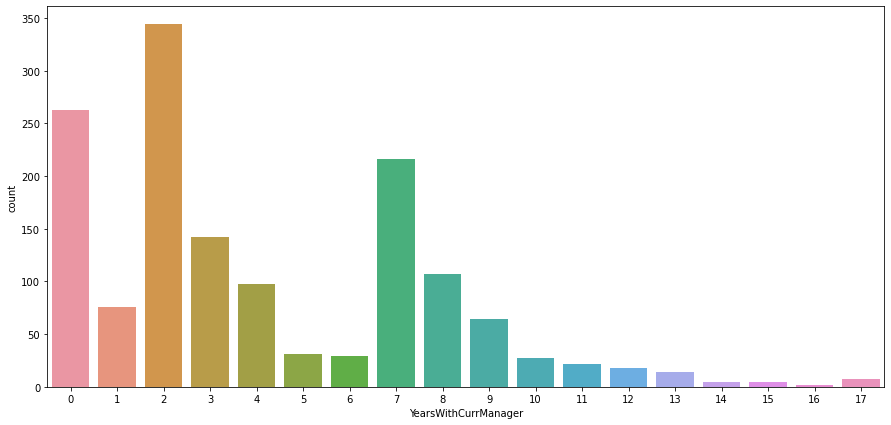

In [73]:
ax=df['YearsWithCurrManager'].value_counts()
print(ax)
plt.figure(figsize=(15,7))
sns.countplot(df['YearsWithCurrManager'])

#
#

YearsWithCurrManager are from 0 to 17

# Encoding of  data

In [77]:
lencoder=LabelEncoder()
df['Attrition']=lencoder.fit_transform(df['Attrition'])
df['BusinessTravel']=lencoder.fit_transform(df['BusinessTravel'])
df['Department']=lencoder.fit_transform(df['Department'])
df['EducationField']=lencoder.fit_transform(df['EducationField'])
df['Gender']=lencoder.fit_transform(df['Gender'])
df['JobRole']=lencoder.fit_transform(df['JobRole'])
df['MaritalStatus']=lencoder.fit_transform(df['MaritalStatus'])
df['OverTime']=lencoder.fit_transform(df['OverTime'])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2


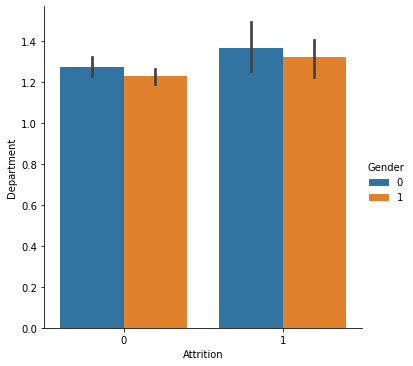

In [78]:
g=sns.catplot(x='Attrition',y='Department',hue='Gender',data=df,kind='bar')
plt.show()

0--->male
1--->female
male employee are working more than female employee

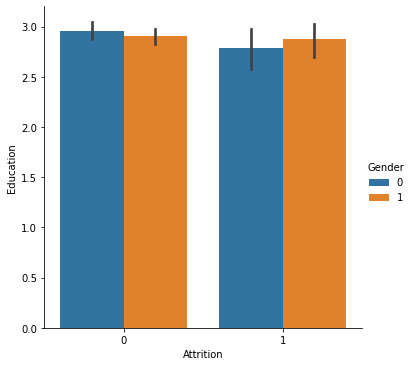

In [79]:
g=sns.catplot(x='Attrition',y='Education',hue='Gender',data=df,kind='bar')
plt.show()

0--->male
1--->female
male employee are heving more educate than female employee

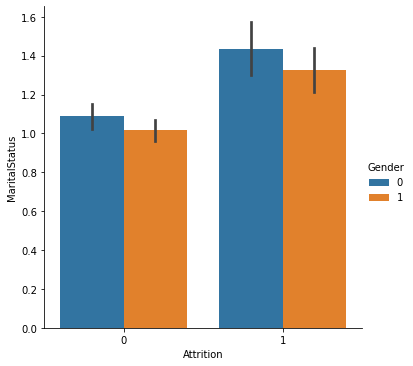

In [80]:
g=sns.catplot(x='Attrition',y='MaritalStatus',hue='Gender',data=df,kind='bar')
plt.show()

0--->male
1--->female
male employee are married more than female employee

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'BusinessTravel'}>],
       [<AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'Department'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>],
       [<AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EducationField'}>,
        <AxesSubplot:title={'center':'EmployeeNumber'}>],
       [<AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>],
       [<AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobRole'}>],
       [<AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MaritalStatus'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>],
       [<Axes

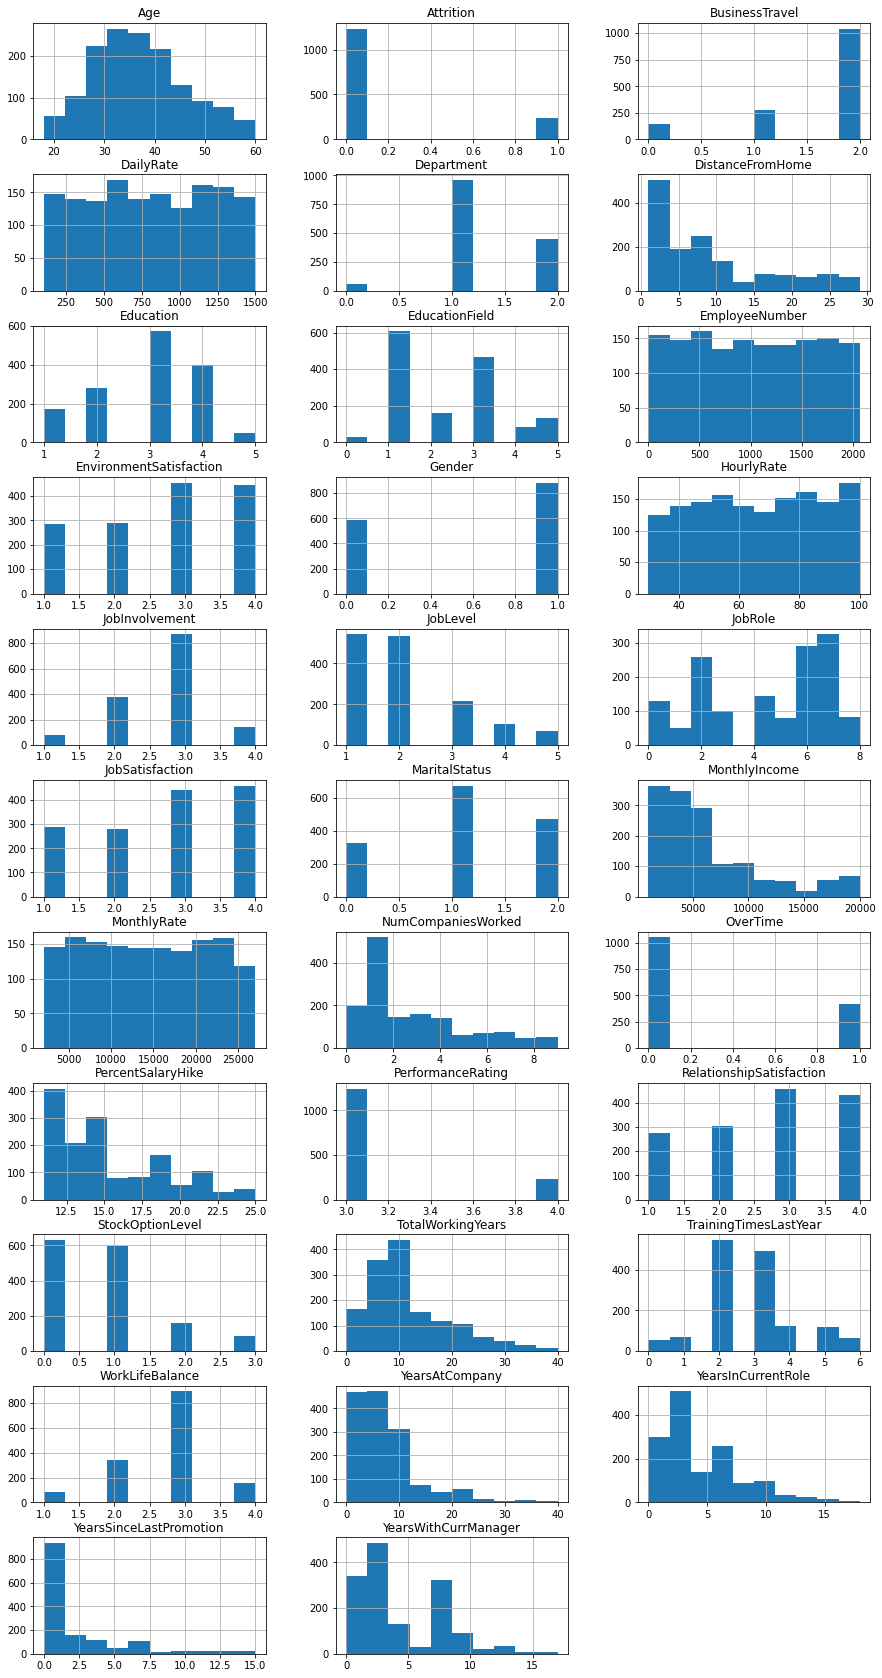

In [82]:
df.hist(figsize=(15,30),layout=(11,3))

<AxesSubplot:xlabel='Age', ylabel='Density'>

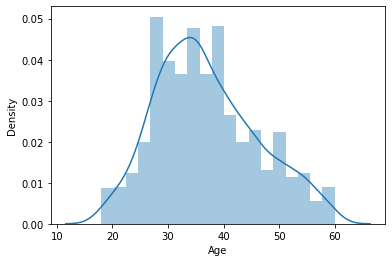

In [83]:
sns.distplot(df['Age'],kde=True)

<AxesSubplot:xlabel='Attrition', ylabel='Density'>

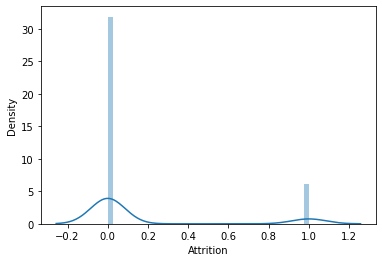

In [84]:
sns.distplot(df['Attrition'],kde=True)

<AxesSubplot:xlabel='DailyRate', ylabel='Density'>

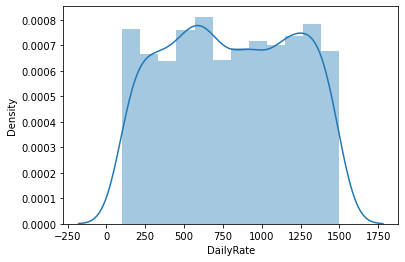

In [85]:
sns.distplot(df['DailyRate'],kde=True)

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Density'>

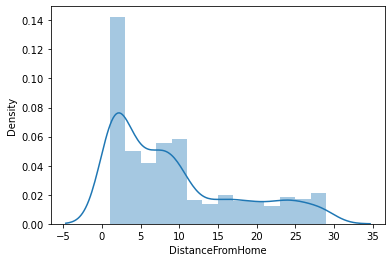

In [86]:
sns.distplot(df['DistanceFromHome'],kde=True)

# Describe the dataset

In [87]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1024.865306,2.721769,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,602.024335,1.093082,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,491.250000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1020.500000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1555.750000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,2068.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<AxesSubplot:>

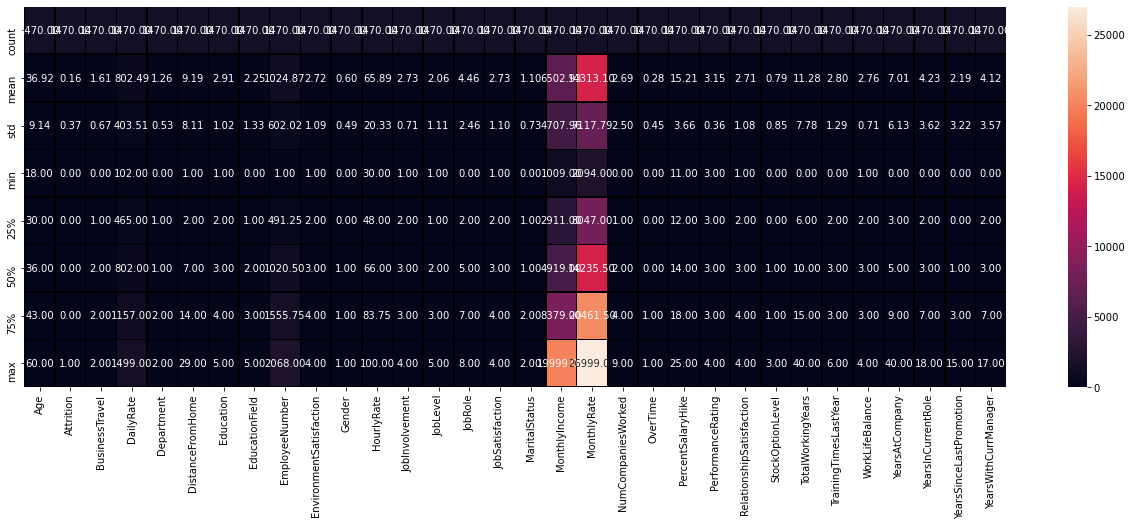

In [89]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')


# Correlation of the columns with the target columns

In [90]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,-0.010145,0.010146,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.010577,-0.103369,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,-0.015578,0.004174,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,-0.050990,0.018355,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.010895,-0.019395,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,0.032916,-0.016075,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,0.042070,-0.027128,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,-0.002516,0.043163,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,1.000000,0.017621,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,0.017621,1.000000,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999


<AxesSubplot:>

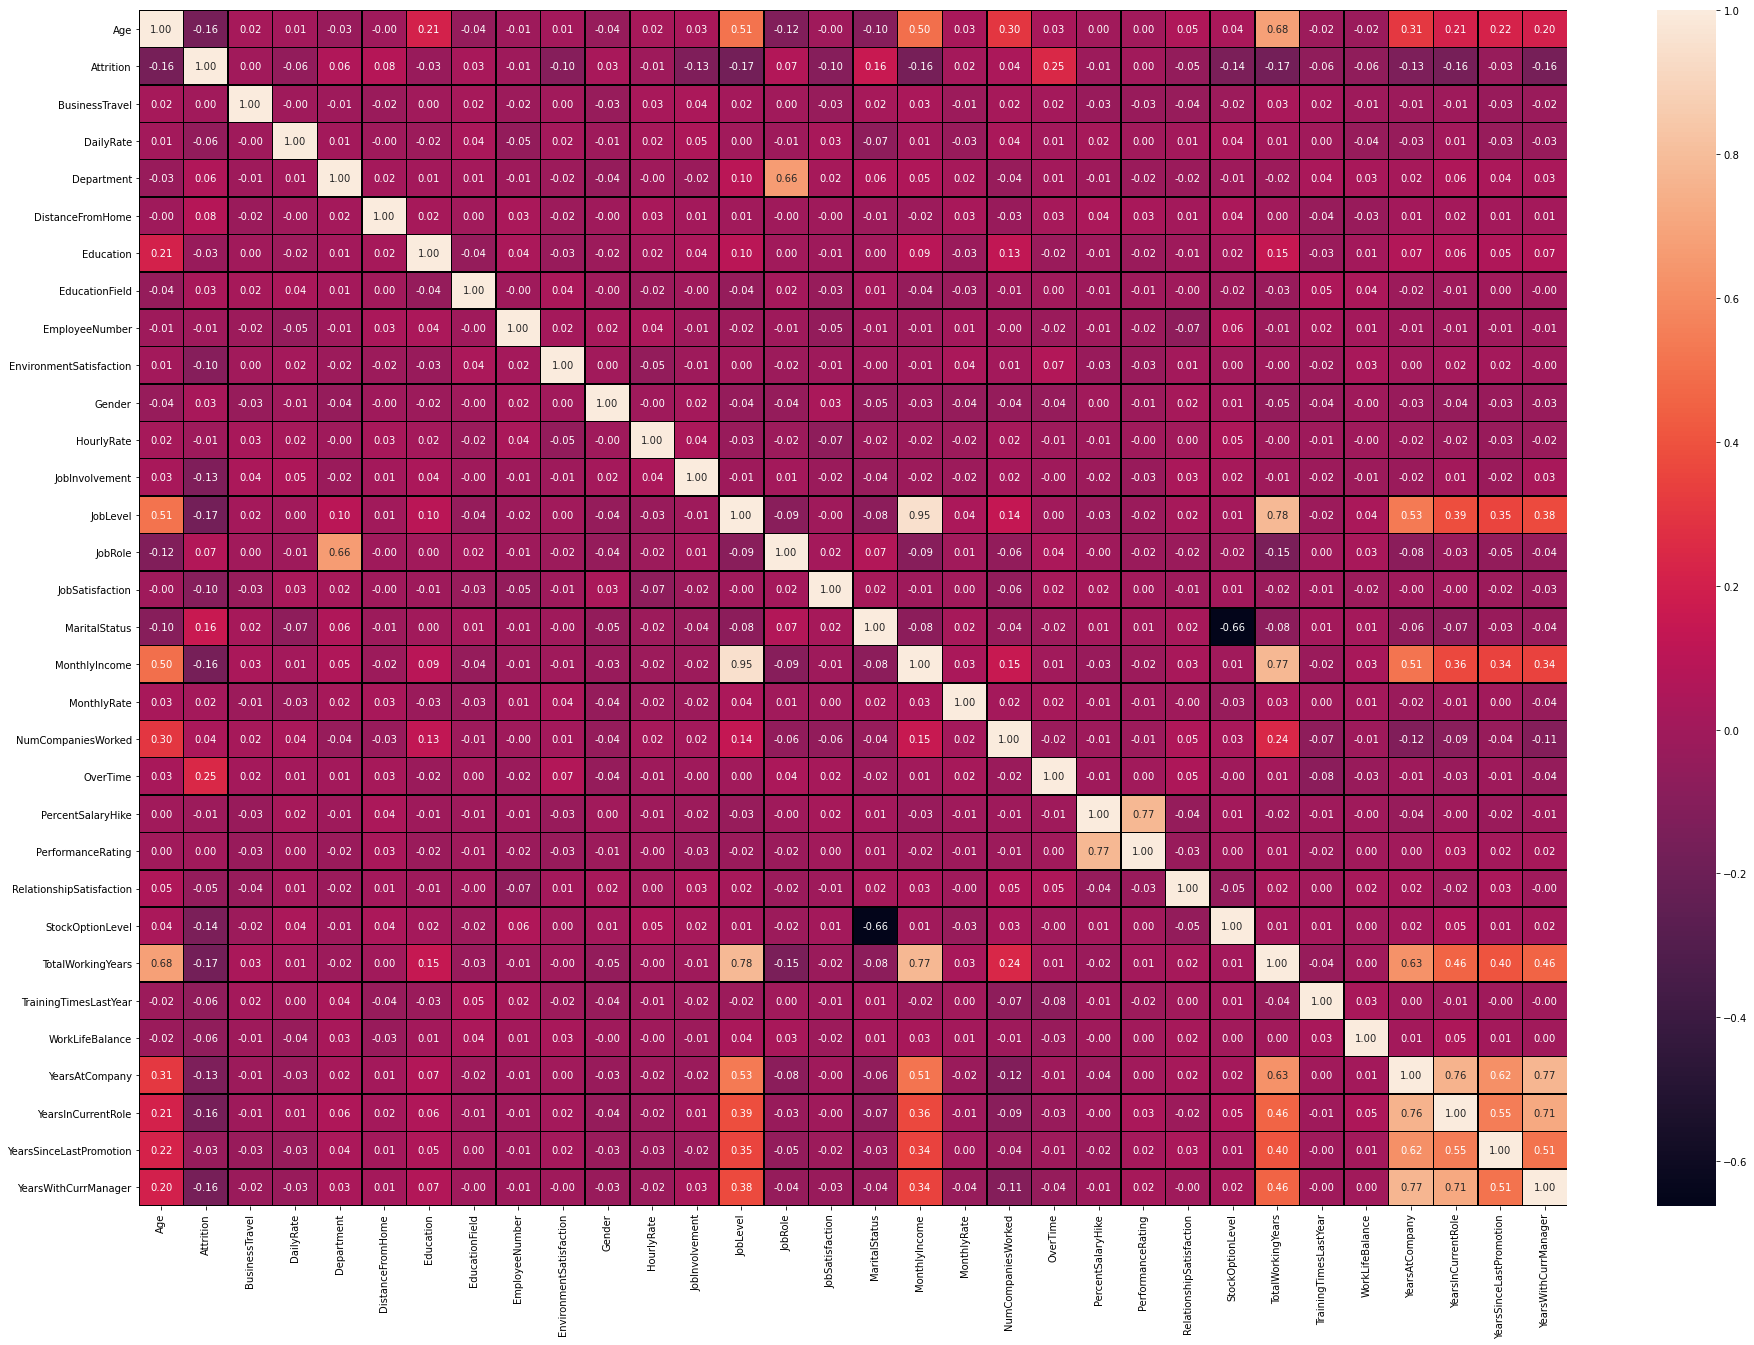

In [95]:
plt.figure(figsize=(32,22))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')


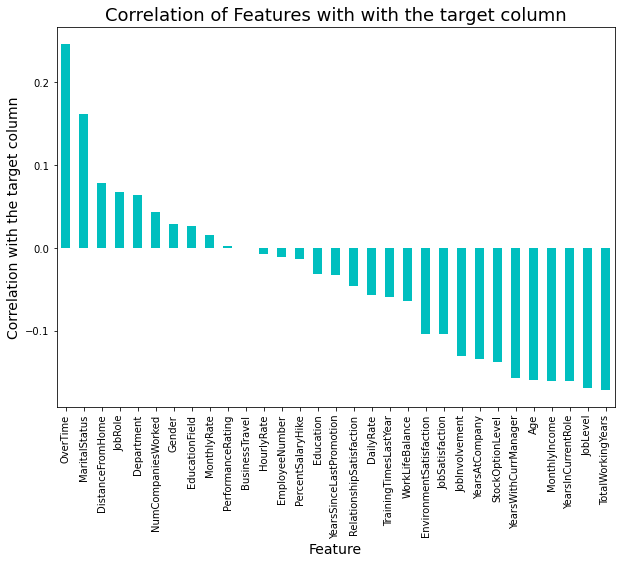

In [93]:
plt.figure(figsize=(10,7))
df.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation of Features with with the target column',fontsize=18)
plt.show()


BusinessTravel has very less correlation -->0.000074
so we drop this column

In [96]:
df.drop(["BusinessTravel"],axis=1,inplace=True)

# Removing outliers

In [97]:
dfy=df.iloc[:,1:2]
dfy

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


In [98]:
dfx=df.copy()
dfx.drop("Attrition",axis=1,inplace=True)

In [99]:
dfx

,Age,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,2,1,2,1,1,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,279,1,8,1,1,2,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,1,2,2,4,4,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,1,3,4,1,5,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,591,1,2,1,3,7,1,1,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,1,23,2,3,2061,3,1,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,1,6,1,3,2062,4,1,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,1,4,3,1,2064,2,1,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,2,3,3,2065,4,1,63,...,3,4,0,17,3,2,9,6,0,8


In [102]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [103]:
def calc_vif(dfx):
    vif=pd.DataFrame()
    vif['variables']=dfx.columns
    vif['VIF_Factor']=[variance_inflation_factor(dfx.values,i) for i in range(dfx.shape[1])]
    return(vif)

In [104]:
calc_vif(dfx)

,variables,VIF_Factor
0,Age,33.264759
1,DailyRate,4.977640
2,Department,12.973655
3,DistanceFromHome,2.320296
4,Education,9.483556
5,EducationField,3.860220
6,EmployeeNumber,3.927929
7,EnvironmentSatisfaction,7.114278
8,Gender,2.510378
9,HourlyRate,11.238199


PerformanceRating is having high vif --->121.064579
so we drop it

In [107]:
dfx.drop(["PerformanceRating"],axis=1,inplace=True)

In [108]:
dfx

,Age,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,2,1,2,1,1,2,0,94,...,11,1,0,8,0,1,6,4,0,5
1,49,279,1,8,1,1,2,3,1,61,...,23,4,1,10,3,3,10,7,1,7
2,37,1373,1,2,2,4,4,4,1,92,...,15,2,0,7,3,3,0,0,0,0
3,33,1392,1,3,4,1,5,4,0,56,...,11,3,0,8,3,3,8,7,3,0
4,27,591,1,2,1,3,7,1,1,40,...,12,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,1,23,2,3,2061,3,1,41,...,17,3,1,17,3,3,5,2,0,3
1466,39,613,1,6,1,3,2062,4,1,42,...,15,1,1,9,5,3,7,7,1,7
1467,27,155,1,4,3,1,2064,2,1,87,...,20,2,1,6,0,3,6,2,0,3
1468,49,1023,2,2,3,3,2065,4,1,63,...,14,4,0,17,3,2,9,6,0,8


In [111]:
dfx1=dfx

In [112]:
def calc_vif(dfx1):
    vif=pd.DataFrame()
    vif['variables']=dfx1.columns
    vif['VIF_Factor']=[variance_inflation_factor(dfx1.values,i) for i in range(dfx1.shape[1])]
    return(vif)

In [113]:
calc_vif(dfx1)

,variables,VIF_Factor
0,Age,32.243034
1,DailyRate,4.944875
2,Department,12.952537
3,DistanceFromHome,2.317960
4,Education,9.419474
5,EducationField,3.824632
6,EmployeeNumber,3.905115
7,EnvironmentSatisfaction,7.005657
8,Gender,2.499921
9,HourlyRate,10.866126


# Skewness

In [114]:
df.skew()

Age                         0.413286
Attrition                   1.844366
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
Y

From the above observation some columns falls under high skewness:

DistanceFromHome 
JobLevel
OverTime                    
PercentSalaryHike 
StockOptionLevel 
TotalWorkingYears
YearsAtCompany              
YearsInCurrentRole          
YearsSinceLastPromotion     
YearsWithCurrManager

# Outliers Check:

<AxesSubplot:>

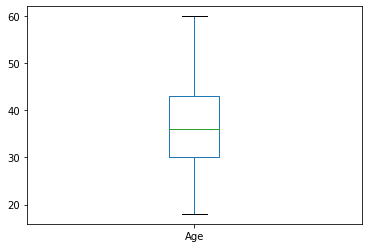

In [115]:
df['Age'].plot.box()

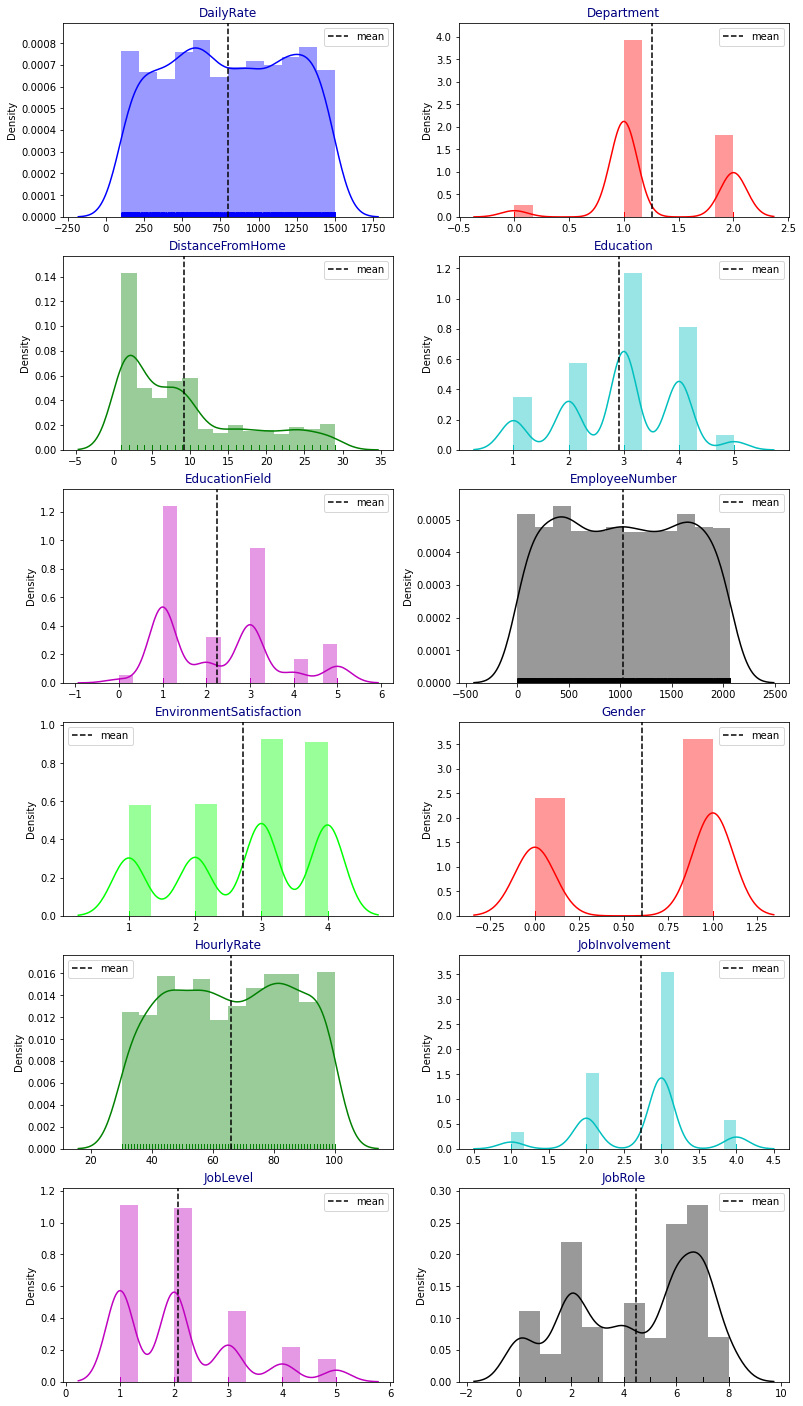

In [118]:
import itertools

cols = ['DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","r","g","c","m","k"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(6,2,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

In [116]:
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

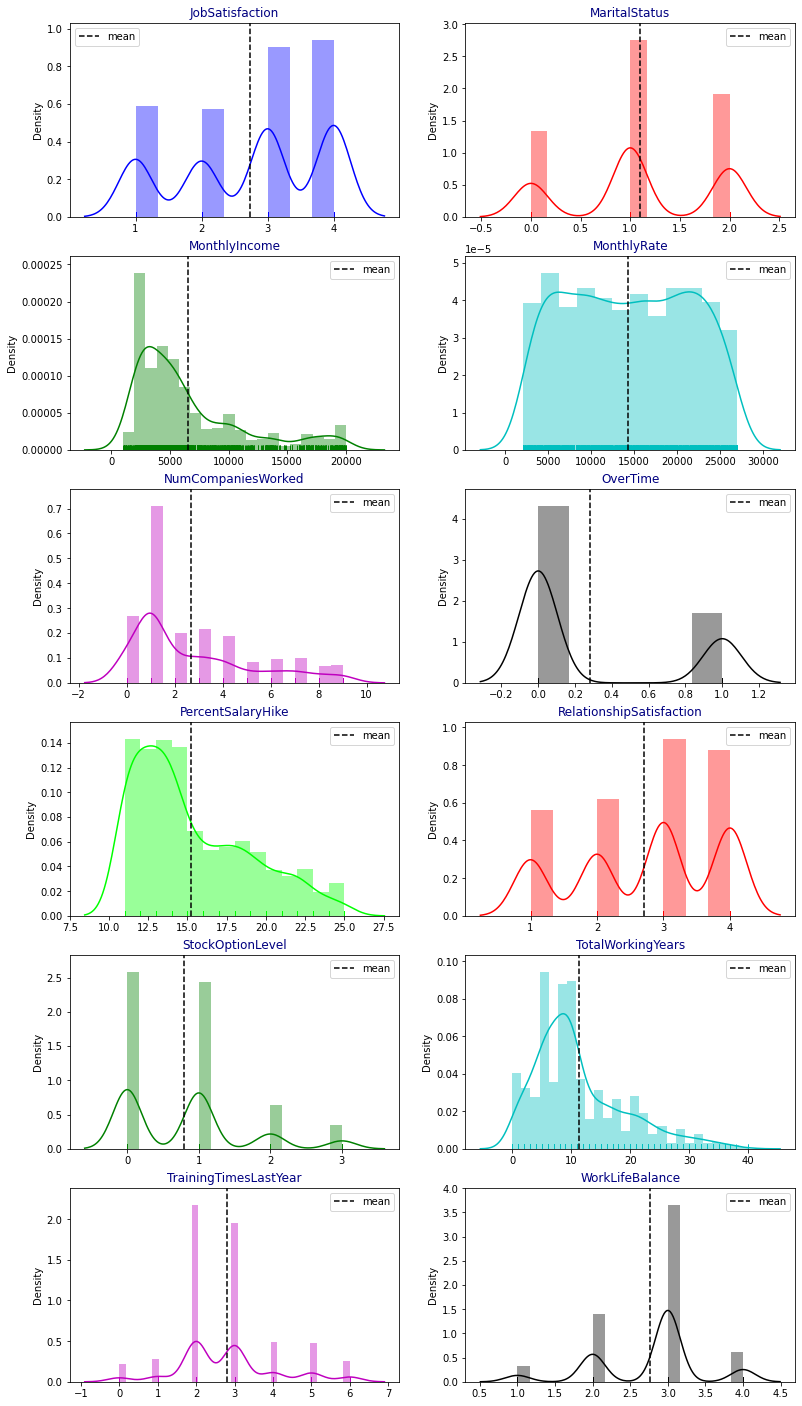

In [119]:
import itertools

cols = ['JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',]
length = len(cols)
cs = ["b","r","g","c","m","k","lime","r","g","c","m","k"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(6,2,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

<AxesSubplot:>

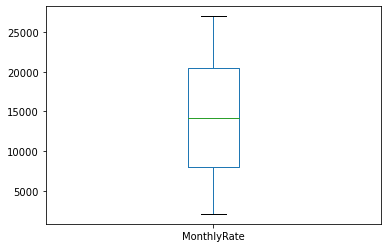

In [122]:
df['MonthlyRate'].plot.box()

<AxesSubplot:>

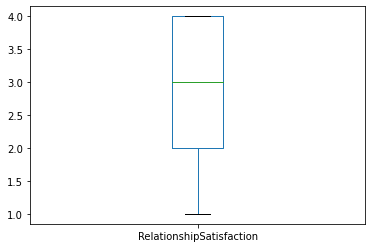

In [125]:
df['RelationshipSatisfaction'].plot.box()

Some Outliers are  much present as it is categorical data

# Outliers Removal

In [126]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
         123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
         218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
         401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
         561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
         677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
         875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
         962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
        1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
        1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
       dtype=int64),
 array([29, 28, 26, 28, 27, 28, 23, 23, 26, 28, 27, 28, 29, 23, 26, 28, 29,
        28, 23, 29, 26, 27, 28, 27, 29, 26, 28, 23, 26, 27, 28, 28, 29, 23,
        26, 26, 28, 28, 23, 27, 26, 26, 28, 26, 29, 28, 26, 23, 26, 28, 29,
        23

In [127]:
df_new=df[(z<3).all(axis=1)]
df_new

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,2,1,2,1,1,2,0,...,11,1,0,8,0,1,6,4,0,5
1,49,0,279,1,8,1,1,2,3,1,...,23,4,1,10,3,3,10,7,1,7
2,37,1,1373,1,2,2,4,4,4,1,...,15,2,0,7,3,3,0,0,0,0
3,33,0,1392,1,3,4,1,5,4,0,...,11,3,0,8,3,3,8,7,3,0
4,27,0,591,1,2,1,3,7,1,1,...,12,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,1,23,2,3,2061,3,1,...,17,3,1,17,3,3,5,2,0,3
1466,39,0,613,1,6,1,3,2062,4,1,...,15,1,1,9,5,3,7,7,1,7
1467,27,0,155,1,4,3,1,2064,2,1,...,20,2,1,6,0,3,6,2,0,3
1468,49,0,1023,2,2,3,3,2065,4,1,...,14,4,0,17,3,2,9,6,0,8


In [128]:
df.shape

(1470, 30)

# Percentage loss of data

In [129]:
percentage_loss=((1470-1387)/1470)*100
print(percentage_loss)

5.646258503401361


In [131]:
dfx.columns

Index(['Age', 'DailyRate', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [132]:
df_new.columns

Index(['Age', 'Attrition', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Sparating the target and feature column

In [133]:
feature=df_new.drop("Attrition",axis=1)
target=df_new["Attrition"]

# Scaling the data using the min max scaler

In [134]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x = mms.fit_transform(feature)
x

array([[0.54761905, 0.71633238, 1.        , ..., 0.26666667, 0.        ,
        0.35714286],
       [0.73809524, 0.12679083, 0.5       , ..., 0.46666667, 0.09090909,
        0.5       ],
       [0.45238095, 0.91045845, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.21428571, 0.03796562, 0.5       , ..., 0.13333333, 0.        ,
        0.21428571],
       [0.73809524, 0.65974212, 1.        , ..., 0.4       , 0.        ,
        0.57142857],
       [0.38095238, 0.37679083, 0.5       , ..., 0.2       , 0.09090909,
        0.14285714]])

In [135]:
y=target
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1387, dtype: int32

# Logistic Regression

In [136]:
lr=LogisticRegression()
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    lr.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training r2_score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing r2_score is:-",accuracy_score(y_test,pred_test)*100)

At random state 72 The model performs very well
At random state:- 72
Training r2_score is:- 87.37601442741209
Testing r2_score is:- 87.41007194244604
At random state 122 The model performs very well
At random state:- 122
Training r2_score is:- 87.10550045085664
Testing r2_score is:- 87.05035971223022
At random state 152 The model performs very well
At random state:- 152
Training r2_score is:- 87.37601442741209
Testing r2_score is:- 87.41007194244604
At random state 160 The model performs very well
At random state:- 160
Training r2_score is:- 87.10550045085664
Testing r2_score is:- 87.05035971223022
At random state 163 The model performs very well
At random state:- 163
Training r2_score is:- 87.37601442741209
Testing r2_score is:- 87.41007194244604
At random state 201 The model performs very well
At random state:- 201
Training r2_score is:- 87.37601442741209
Testing r2_score is:- 87.41007194244604
At random state 237 The model performs very well
At random state:- 237
Training r2_score i

In [137]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=72,test_size=0.20)

In [138]:
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

[[215  20]
 [ 37   6]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       235
           1       0.23      0.14      0.17        43

    accuracy                           0.79       278
   macro avg       0.54      0.53      0.53       278
weighted avg       0.76      0.79      0.77       278



# Cross validation for logistic regression

In [139]:
from sklearn.model_selection import cross_val_score
pred_lr = lr.predict(x_test)

lrcs= accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lrscore = cross_val_score(lr,x,y,cv=j)
    lrc = lrscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",lrc*100 )
    print("accuracy_score is :-",lrcs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 86.22890078221491
accuracy_score is :- 88.12949640287769


At cv:- 3
Cross validation score is:- 86.87756927497749
accuracy_score is :- 88.12949640287769


At cv:- 4
Cross validation score is:- 86.51759091136246
accuracy_score is :- 88.12949640287769


At cv:- 5
Cross validation score is:- 87.02205022985223
accuracy_score is :- 88.12949640287769


At cv:- 6
Cross validation score is:- 86.80462258048465
accuracy_score is :- 88.12949640287769


At cv:- 7
Cross validation score is:- 86.87593813221953
accuracy_score is :- 88.12949640287769


At cv:- 8
Cross validation score is:- 86.87587203508073
accuracy_score is :- 88.12949640287769


At cv:- 9
Cross validation score is:- 86.87520364939719
accuracy_score is :- 88.12949640287769




In [140]:
print("At cv:-",3)
print("Cross validation score is:-",86.877 )
print("Accuracy_score is :-",88.129)


At cv:- 3
Cross validation score is:- 86.877
Accuracy_score is :- 88.129


# AUC-ROC curve

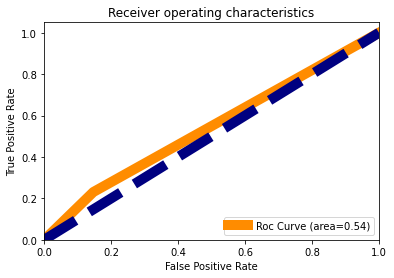

In [141]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
fpr, tpr, threshold = roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)


plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc Curve (area=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1], color='navy',lw=10, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

In [142]:
auc_score=roc_auc_score(y_test,lr.predict(x_test))
print(auc_score)

0.6637803067788223


# Classification model buliding

In [143]:
mnb=MultinomialNB()
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    mnb.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=mnb.predict(x_train)
    pred_test=mnb.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

At random state 26 The model performs very well
At random state:- 26
Training score is:- 83.49864743011722
Testing score is:- 83.45323741007195
At random state 31 The model performs very well
At random state:- 31
Training score is:- 83.49864743011722
Testing score is:- 83.45323741007195
At random state 71 The model performs very well
At random state:- 71
Training score is:- 83.49864743011722
Testing score is:- 83.45323741007195
At random state 82 The model performs very well
At random state:- 82
Training score is:- 83.49864743011722
Testing score is:- 83.45323741007195
At random state 90 The model performs very well
At random state:- 90
Training score is:- 83.49864743011722
Testing score is:- 83.45323741007195
At random state 127 The model performs very well
At random state:- 127
Training score is:- 83.49864743011722
Testing score is:- 83.45323741007195
At random state 161 The model performs very well
At random state:- 161
Training score is:- 83.49864743011722
Testing score is:- 83.453

In [144]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=26,test_size=0.20)

In [145]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
pred_test=mnb.predict(x_test)
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.8345323741007195
[[232   0]
 [ 46   0]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       232
           1       0.00      0.00      0.00        46

    accuracy                           0.83       278
   macro avg       0.42      0.50      0.45       278
weighted avg       0.70      0.83      0.76       278



# Cross-validation for MultinomialNB

In [146]:
from sklearn.model_selection import cross_val_score
pred_mnb = mnb.predict(x_test)

mnbcs= accuracy_score(y_test,pred_mnb)
for j in range(2,10):
    mnbscore = cross_val_score(mnb,x,y,cv=j)
    mnbc = mnbscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",mnbc*100 )
    print("accuracy_score is :-",mnbcs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 83.5617392533819
accuracy_score is :- 83.45323741007195


At cv:- 3
Cross validation score is:- 83.48963251771026
accuracy_score is :- 83.45323741007195


At cv:- 4
Cross validation score is:- 83.48957205443854
accuracy_score is :- 83.45323741007195


At cv:- 5
Cross validation score is:- 83.48959821312626
accuracy_score is :- 83.45323741007195


At cv:- 6
Cross validation score is:- 83.48976215355526
accuracy_score is :- 83.45323741007195


At cv:- 7
Cross validation score is:- 83.48959806246238
accuracy_score is :- 83.45323741007195


At cv:- 8
Cross validation score is:- 83.48988439306359
accuracy_score is :- 83.45323741007195


At cv:- 9
Cross validation score is:- 83.48973607038124
accuracy_score is :- 83.45323741007195




In [147]:

print("At cv:-",2)
print("Cross validation score is:-",83.561 )
print("Accuracy_score is :-",83.453)

At cv:- 2
Cross validation score is:- 83.561
Accuracy_score is :- 83.453


# Auc Roc Curve

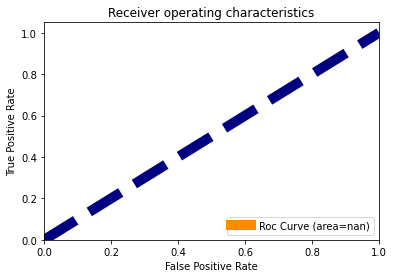

In [149]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)


plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc Curve (area=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1], color='navy',lw=10, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

In [150]:
svc=SVC(kernel='rbf')
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    svc.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=svc.predict(x_train)
    pred_test=svc.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

At random state 399 The model performs very well
At random state:- 399
Training score is:- 89.90081154192967
Testing score is:- 89.92805755395683
At random state 486 The model performs very well
At random state:- 486
Training score is:- 89.17944093778178
Testing score is:- 89.20863309352518
At random state 538 The model performs very well
At random state:- 538
Training score is:- 89.6302975653742
Testing score is:- 89.568345323741


In [151]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=399,test_size=0.20)

In [152]:
def svmkernel(ker):
    svc=SVC(kernel=ker)  
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    pred_test=svc.predict(x_test)
    print(accuracy_score(y_test,pred_test))
    print(confusion_matrix(y_test,pred_test))
    print(classification_report(y_test,pred_test))


In [153]:
svmkernel('rbf')

0.8992805755395683
[[243   1]
 [ 27   7]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       244
           1       0.88      0.21      0.33        34

    accuracy                           0.90       278
   macro avg       0.89      0.60      0.64       278
weighted avg       0.90      0.90      0.87       278



# Cross-validation for SVM for rbf kernel

In [154]:
from sklearn.model_selection import cross_val_score
pred_svc = svc.predict(x_test)

svccs= accuracy_score(y_test,pred_svc)
for j in range(2,10):
    svcscore = cross_val_score(svc,x,y,cv=j)
    svcc = svcscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",svcc*100 )
    print("accuracy_score is :-",svccs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 85.21994336115372
accuracy_score is :- 93.88489208633094


At cv:- 3
Cross validation score is:- 86.44622715897013
accuracy_score is :- 93.88489208633094


At cv:- 4
Cross validation score is:- 85.79754626776166
accuracy_score is :- 93.88489208633094


At cv:- 5
Cross validation score is:- 86.08627899124744
accuracy_score is :- 93.88489208633094


At cv:- 6
Cross validation score is:- 86.30143802557595
accuracy_score is :- 93.88489208633094


At cv:- 7
Cross validation score is:- 86.44448795202564
accuracy_score is :- 93.88489208633094


At cv:- 8
Cross validation score is:- 86.37382898146302
accuracy_score is :- 93.88489208633094


At cv:- 9
Cross validation score is:- 86.22957687473816
accuracy_score is :- 93.88489208633094




In [155]:

print("At cv:-",3)
print("Cross validation score is:-",86.446)
print("Accuracy_score is :-",93.884)

At cv:- 3
Cross validation score is:- 86.446
Accuracy_score is :- 93.884


In [156]:
svc=SVC(kernel='linear')
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    svc.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=svc.predict(x_train)
    pred_test=svc.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

At random state 80 The model performs very well
At random state:- 80
Training score is:- 87.8268710550045
Testing score is:- 87.76978417266187
At random state 85 The model performs very well
At random state:- 85
Training score is:- 87.37601442741209
Testing score is:- 87.41007194244604
At random state 117 The model performs very well
At random state:- 117
Training score is:- 87.10550045085664
Testing score is:- 87.05035971223022
At random state 203 The model performs very well
At random state:- 203
Training score is:- 87.10550045085664
Testing score is:- 87.05035971223022
At random state 207 The model performs very well
At random state:- 207
Training score is:- 88.09738503155997
Testing score is:- 88.12949640287769
At random state 236 The model performs very well
At random state:- 236
Training score is:- 87.8268710550045
Testing score is:- 87.76978417266187
At random state 471 The model performs very well
At random state:- 471
Training score is:- 87.37601442741209
Testing score is:- 87

In [157]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=207,test_size=0.20)

print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.8273381294964028
[[223  17]
 [ 31   7]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       240
           1       0.29      0.18      0.23        38

    accuracy                           0.83       278
   macro avg       0.58      0.56      0.56       278
weighted avg       0.80      0.83      0.81       278



# Cross-validation for SVM for linear kernel

In [158]:
from sklearn.model_selection import cross_val_score
pred_svc = svc.predict(x_test)

svccs= accuracy_score(y_test,pred_svc)
for j in range(2,10):
    svcscore = cross_val_score(svc,x,y,cv=j)
    svcc = svcscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",svcc*100 )
    print("accuracy_score is :-",svccs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 86.01349019216454
accuracy_score is :- 89.568345323741


At cv:- 3
Cross validation score is:- 86.4456038322129
accuracy_score is :- 89.568345323741


At cv:- 4
Cross validation score is:- 86.51779913711249
accuracy_score is :- 89.568345323741


At cv:- 5
Cross validation score is:- 86.44599122146326
accuracy_score is :- 89.568345323741


At cv:- 6
Cross validation score is:- 86.30112703388565
accuracy_score is :- 89.568345323741


At cv:- 7
Cross validation score is:- 86.87630069539617
accuracy_score is :- 89.568345323741


At cv:- 8
Cross validation score is:- 86.37382898146302
accuracy_score is :- 89.568345323741


At cv:- 9
Cross validation score is:- 86.44369966950612
accuracy_score is :- 89.568345323741




In [159]:
print("At cv:-",4)
print("Cross validation score is:-",86.517)
print("Accuracy_score is :-", 89.568)

At cv:- 4
Cross validation score is:- 86.517
Accuracy_score is :- 89.568


In [160]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(x_train,y_train)
GridSearchCV(estimator=SVC(),param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
sorted(clf.cv_results_.keys())



print(clf.best_params_)

{'C': 1, 'kernel': 'linear'}


In [161]:
svcr = SVC(C=1, kernel='linear')
svcr.fit(x_train,y_train)
svcr.score(x_train,y_train)
pred_svcr = svcr.predict(x_test)

svcsr = accuracy_score(y_test,pred_svcr)
print('Accuracy Score:',svcsr*100)

svcrscore = cross_val_score(svcr,x,y,cv=3)
svccr = svcrscore.mean() 
print('Cross Val Score:',svccr*100)

Accuracy Score: 88.12949640287769
Cross Val Score: 86.4456038322129


# Auc roc curve for SVM with 'linear' kernel

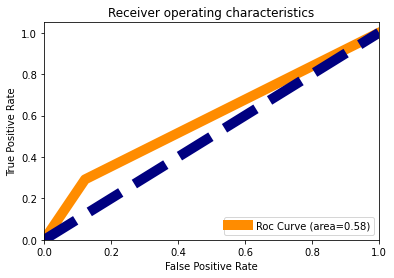

In [162]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)


plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc Curve (area=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1], color='navy',lw=10, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

In [166]:
dtc=DecisionTreeClassifier()
for i in range(1,4000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    dtc.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=dtc.predict(x_train)
    pred_test=dtc.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

In [167]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=51,test_size=0.20)

In [168]:
dtc=DecisionTreeClassifier() 
dtc.fit(x_train,y_train)

dtc.score(x_train,y_train)
pred_test=dtc.predict(x_test)
pred_train=dtc.predict(x_train)
print(accuracy_score(y_test,pred_test))
print(accuracy_score(y_train,pred_train))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.7841726618705036
1.0
[[203  34]
 [ 26  15]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       237
           1       0.31      0.37      0.33        41

    accuracy                           0.78       278
   macro avg       0.60      0.61      0.60       278
weighted avg       0.80      0.78      0.79       278



Here the model is overfitting as training accuracy is greater than testing accuracy.

# Cross validation of DTC model

In [169]:
from sklearn.model_selection import cross_val_score
dtc=DecisionTreeClassifier() 
#pred_dtc = dtc.predict(x_test)
dtccs= accuracy_score(y_test,pred_test)
for j in range(2,10):
    dtcscore = cross_val_score(dtc,x,y,cv=j)
    dtcc = dtcscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",dtcc*100 )
    print("accuracy_score is :-",dtccs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 53.7311151864466
accuracy_score is :- 78.41726618705036


At cv:- 3
Cross validation score is:- 77.43307808102622
accuracy_score is :- 78.41726618705036


At cv:- 4
Cross validation score is:- 77.93681597841115
accuracy_score is :- 78.41726618705036


At cv:- 5
Cross validation score is:- 77.86536114069034
accuracy_score is :- 78.41726618705036


At cv:- 6
Cross validation score is:- 77.29636264119023
accuracy_score is :- 78.41726618705036


At cv:- 7
Cross validation score is:- 74.56256752739165
accuracy_score is :- 78.41726618705036


At cv:- 8
Cross validation score is:- 76.70545146501892
accuracy_score is :- 78.41726618705036


At cv:- 9
Cross validation score is:- 76.06665735697995
accuracy_score is :- 78.41726618705036




In [170]:

print("At cv:-",4)
print("Cross validation score is:-",77.93)
print("Accuracy_score is :-", 78.417)

At cv:- 4
Cross validation score is:- 77.93
Accuracy_score is :- 78.417


In [171]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier() 
params ={"criterion":['gini','entropy'],"max_depth":range(1,10), "min_samples_split":range(1,10),"min_samples_leaf":range(1,5)}
                
grid = GridSearchCV(dtc, param_grid = params, cv=4,verbose=1,n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_estimator_)

print("Best parameters are: ",grid.best_params_)

print("Accuracy score: ",grid.best_score_)

Fitting 4 folds for each of 648 candidates, totalling 2592 fits
DecisionTreeClassifier(criterion='entropy', max_depth=2)
Best parameters are:  {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy score:  0.8376782328649716


In [172]:
knn=KNeighborsClassifier(n_neighbors=5)
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    knn.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

At random state 221 The model performs very well
At random state:- 221
Training score is:- 87.37601442741209
Testing score is:- 87.41007194244604
At random state 274 The model performs very well
At random state:- 274
Training score is:- 86.6546438232642
Testing score is:- 86.6906474820144
At random state 794 The model performs very well
At random state:- 794
Training score is:- 86.02344454463481
Testing score is:- 85.97122302158273
At random state 912 The model performs very well
At random state:- 912
Training score is:- 86.74481514878268
Testing score is:- 86.6906474820144
At random state 954 The model performs very well
At random state:- 954
Training score is:- 87.10550045085664
Testing score is:- 87.05035971223022
At random state 974 The model performs very well
At random state:- 974
Training score is:- 86.29395852119026
Testing score is:- 86.33093525179856


In [173]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=221,test_size=0.20)

In [174]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
pred_test=knn.predict(x_test)
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.8741007194244604
[[237   5]
 [ 30   6]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       242
           1       0.55      0.17      0.26        36

    accuracy                           0.87       278
   macro avg       0.72      0.57      0.59       278
weighted avg       0.84      0.87      0.84       278



In [175]:
knn=KNeighborsClassifier(n_neighbors=5) 
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
knncs= accuracy_score(y_test,pred_knn)
for j in range(2,10):
    knnscore = cross_val_score(knn,x,y,cv=j)
    knnc = knnscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",knnc*100 )
    print("accuracy_score is :-",knncs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 82.9848505641013
accuracy_score is :- 87.41007194244604


At cv:- 3
Cross validation score is:- 83.70655022922841
accuracy_score is :- 87.41007194244604


At cv:- 4
Cross validation score is:- 83.9228898402492
accuracy_score is :- 87.41007194244604


At cv:- 5
Cross validation score is:- 83.92333064955977
accuracy_score is :- 87.41007194244604


At cv:- 6
Cross validation score is:- 83.6337513061651
accuracy_score is :- 87.41007194244604


At cv:- 7
Cross validation score is:- 83.78001116694584
accuracy_score is :- 87.41007194244604


At cv:- 8
Cross validation score is:- 83.20377383562554
accuracy_score is :- 87.41007194244604


At cv:- 9
Cross validation score is:- 83.49206349206348
accuracy_score is :- 87.41007194244604




In [177]:

print("At cv:-",4)
print("Cross validation score is:-",83.922)
print("Accuracy_score is :-", 87.410)

At cv:- 4
Cross validation score is:- 83.922
Accuracy_score is :- 87.41


In [178]:
from sklearn.metrics import f1_score
y_true = y_test
#y_pred = pred_knn
dtc_f1=f1_score(y_true, pred_test, average='macro')
knn_f1=f1_score(y_true, pred_knn, average='macro')
svcr_f1=f1_score(y_true, pred_svcr, average='macro')
mnb_f1=f1_score(y_true, pred_mnb, average='macro')

print("dtc f1 score",dtc_f1)
print("knn f1 score",knn_f1)
print("svcr f1 score",svcr_f1)
print("mnb f1 score",mnb_f1)

dtc f1 score 0.5932784349788905
knn f1 score 0.5932784349788905
svcr f1 score 0.45383104125736734
mnb f1 score 0.4653846153846154


In [179]:
y_true = y_test
#y_pred = pred_knn
dtc_f1=f1_score(y_true, pred_test, average='weighted')
knn_f1=f1_score(y_true, pred_knn, average='weighted')
svcr_f1=f1_score(y_true, pred_svcr, average='weighted')
mnb_f1=f1_score(y_true, pred_mnb, average='weighted')

print("dtc f1 score",dtc_f1)
print("knn f1 score",knn_f1)
print("svcr f1 score",svcr_f1)
print("mnb f1 score",mnb_f1)

dtc f1 score 0.8437086972983165
knn f1 score 0.8437086972983165
svcr f1 score 0.7901231078005964
mnb f1 score 0.8102379634753736


# The best model is SVM classifier with linear kernel. Since the difference between the percentage score of cross validation and accuracy_score is optimum and f1 score is also good in all other model.

# Model Saving

In [180]:
import pickle
filename = 'inhouse_HRAnalytics.pkl'
pickle.dump(svcr, open(filename, 'wb'))

# Conclusion

In [181]:
import numpy as np
a=np.array(y_test)
a

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [182]:
predicted=np.array(svcr.predict(x_test))
predicted

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [183]:
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
df_com

,original,predicted
0,0,0
1,0,0
2,1,0
3,0,0
4,0,1
...,...,...
273,0,0
274,1,0
275,0,0
276,1,1


# From the above table the model is predicted the values with 80 percent accuracy